In [49]:
import nltk
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import umap
import hdbscan
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

In [50]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [51]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [52]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [54]:
df.shape

(23486, 11)

In [55]:
df = df.dropna().drop_duplicates()

In [56]:
df.shape

(19662, 11)

In [57]:
df = df.reset_index(drop=True)

In [58]:
df['Division Name'].value_counts()

Division Name
General           11664
General Petite     6778
Initmates          1220
Name: count, dtype: int64

In [59]:
df['Department Name'].value_counts()

Department Name
Tops        8713
Dresses     5371
Bottoms     3184
Intimate    1408
Jackets      879
Trend        107
Name: count, dtype: int64

### Preprocess Text

In [60]:
def clean_text(text):
    # Tokenize the text
    tokenized_text = word_tokenize(text)

    # Remove punctuation
    tokenized_text = [word for word in tokenized_text if word not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokenized_text = [word for word in tokenized_text if word not in stop_words]
    
    # Remove tokens that are too short
    tokenized_text = [word for word in tokenized_text if len(word) >= 2]

   # Lemmatize the text
    lemmatizer = WordNetLemmatizer()
    tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]

    # Join the words into a single string
    cleaned_text = ' '.join(tokenized_text)
    
    return cleaned_text

In [61]:
df['Review Text'][1]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [62]:
df['toks'] = df['Review Text'].apply(clean_text)

### Bertopic Default

In [63]:
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

In [64]:
model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)

In [65]:
topics, probs = model.fit_transform(df['toks'])

Batches:   0%|          | 0/615 [00:00<?, ?it/s]

2024-04-11 16:00:52,598 - BERTopic - Transformed documents to Embeddings
2024-04-11 16:01:10,277 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2024-04-11 16:01:22,292 - BERTopic - Clustered reduced embeddings


In [66]:
freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9080,-1_dress_size_fit_nt,"[dress, size, fit, nt, love, color, like, look...",[saw dress local retailer store try say enough...
1,0,1168,0_sweater_love sweater_itchy_sleeve,"[sweater, love sweater, itchy, sleeve, soft, c...",[This sweater beautiful color cute fur collar ...
2,1,968,1_shirt_tshirt_love shirt_love,"[shirt, tshirt, love shirt, love, nt, fit, gre...",[bought shirt teal/navy loved much went back b...
3,2,762,2_skirt_love skirt_waist_size,"[skirt, love skirt, waist, size, fit, great, l...",[love skirt theory style fun original quality ...
4,3,620,3_jacket_coat_love jacket_warm,"[jacket, coat, love jacket, warm, sleeve, medi...",[When purchasing asked `` really need another ...
5,4,610,4_jean_pair_stretch_ag,"[jean, pair, stretch, ag, denim, 28, fit, 27, ...",[Long-time ag jean fan lately though 'm findin...
6,5,542,5_blouse_love blouse_size_fit,"[blouse, love blouse, size, fit, nt, look, bea...",['m xl retailer top xl blouse fit wonderfully ...
7,6,471,6_dress_size_fit_lb,"[dress, size, fit, lb, chest, bust, ordered, s...",[This dress seems quite high quality wonderful...
8,7,394,7_cute_love_really_like,"[cute, love, really, like, great, nt, look, bo...",[This cute unique top absolutely love back mak...
9,8,376,8_pant_love pant_pair_comfortable,"[pant, love pant, pair, comfortable, fit, pant...",[absolutely love pant searching pair linen pan...


In [67]:
freq_df = model.get_topic_info()
print("Number of topics: {}".format( len(freq_df)))

Number of topics: 104


In [68]:
# to get visualizations
# import kaleido
import plotly.io as pio
pio.renderers.default='iframe'
# pio.renderers.default = 'svg'
# import os
# os.environ['TOKENIZERS_PARALLELISM'] = 'false'

In [69]:
model.visualize_barchart()

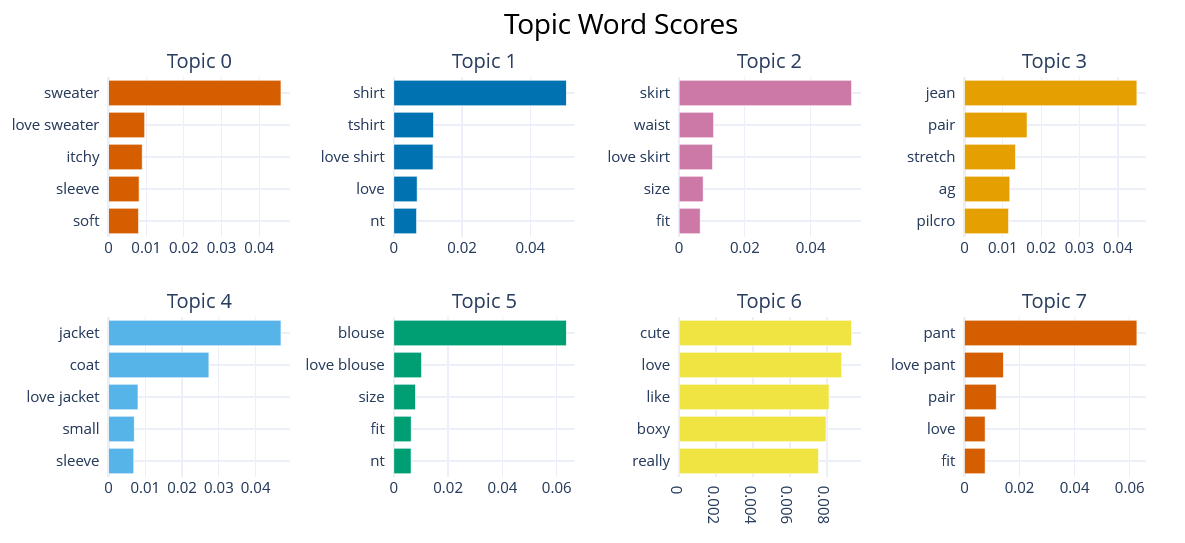

### FINE TUNNING BERTOPIC

#### Transformer Embedding

In [70]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [71]:
embedding_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [72]:
sentences_list = df['toks'].tolist()

In [73]:
embeds = embedding_model.encode(sentences_list)

### Dimensionality Reduction UMAP

In [74]:
fit = umap.UMAP(n_neighbors=3, n_components=3, min_dist=0.05)  
u = fit.fit_transform(embeds)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning:

invalid value encountered in sqrt



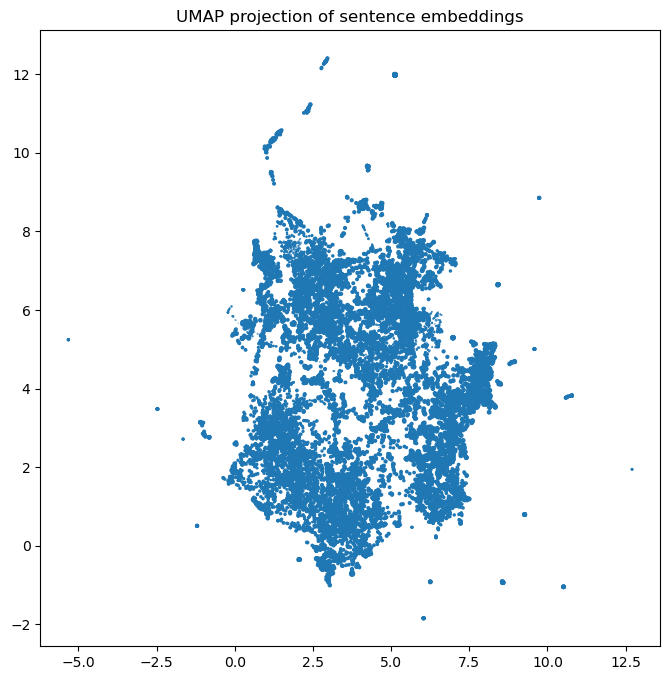

In [75]:
plt.figure(figsize=(8,8)) # Increase figure size
plt.scatter(u[:, 0], u[:, 1], u[:, 2])
plt.title('UMAP projection of sentence embeddings')
plt.show()

### HDBSCAN CLUSTERING

In [76]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=500, min_samples=300, gen_min_span_tree=True)
clusterer.fit(u)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=500, min_samples=300)

<AxesSubplot:ylabel='$\\lambda$ value'>

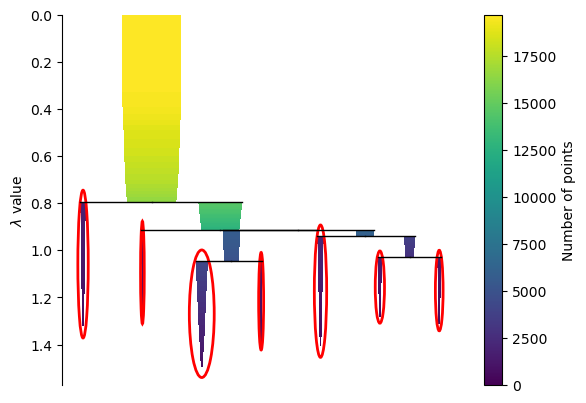

In [77]:
clusterer.condensed_tree_.plot(select_clusters=True)

In [78]:
print(clusterer.relative_validity_)

0.20476221674823103


### FINE TUNED BERTOPIC

In [79]:
umap_model = umap.UMAP(n_components=3, n_neighbors=100, min_dist=0.05)

In [80]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=500, min_samples=300, gen_min_span_tree=True, prediction_data=True)

In [81]:
model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)

In [82]:
topics, probs = model.fit_transform(df['toks'])

Batches:   0%|          | 0/615 [00:00<?, ?it/s]

2024-04-11 16:08:18,999 - BERTopic - Transformed documents to Embeddings
2024-04-11 16:08:54,393 - BERTopic - Reduced dimensionality
2024-04-11 16:08:58,198 - BERTopic - Clustered reduced embeddings


In [83]:
freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,8696,-1_fit_size_love_color,"[fit, size, love, color, like]",[bought red x 115lbs 's really cute flirty lit...
1,0,3739,0_dress_fit_size_love,"[dress, fit, size, love, like]",[Love dress sooo comfortable flattering typica...
2,1,1813,1_sweater_jacket_love_coat,"[sweater, jacket, love, coat, color]",[attracted sweater 's unique style really love...
3,2,1629,2_pant_jean_fit_pair,"[pant, jean, fit, pair, size]",[probably 10 pair pilcro jean pant jean skinny...
4,3,1517,3_love_like_look_fit,"[love, like, look, fit, size]",[wanted love top unfortunately work material n...
5,4,1133,4_shirt_love_tee_fit,"[shirt, love, tee, fit, color]",[This shirt awesome absolutely love style shir...
6,5,627,5_skirt_size_fit_waist,"[skirt, size, fit, waist, love]",[absolutely love way skirt look fit smaller wa...
7,6,508,6_blouse_size_fit_love,"[blouse, size, fit, love, look]",[Great blouse curvy woman 'm always xl retaile...


In [84]:
freq_df = model.get_topic_info()
print("Number of topics: {}".format( len(freq_df)))

Number of topics: 8


In [85]:
model.visualize_barchart()

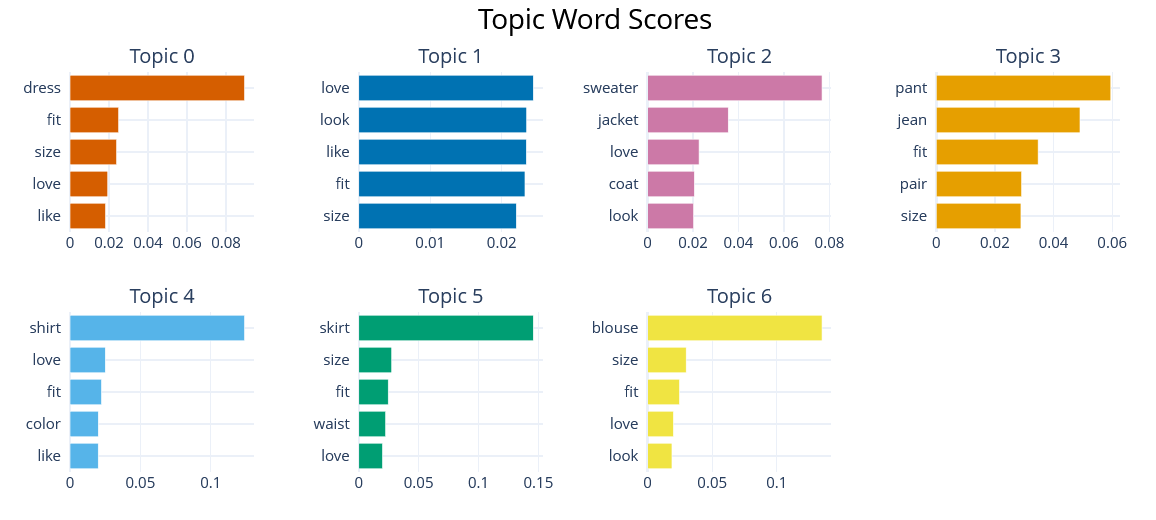

In [86]:
model.visualize_topics()

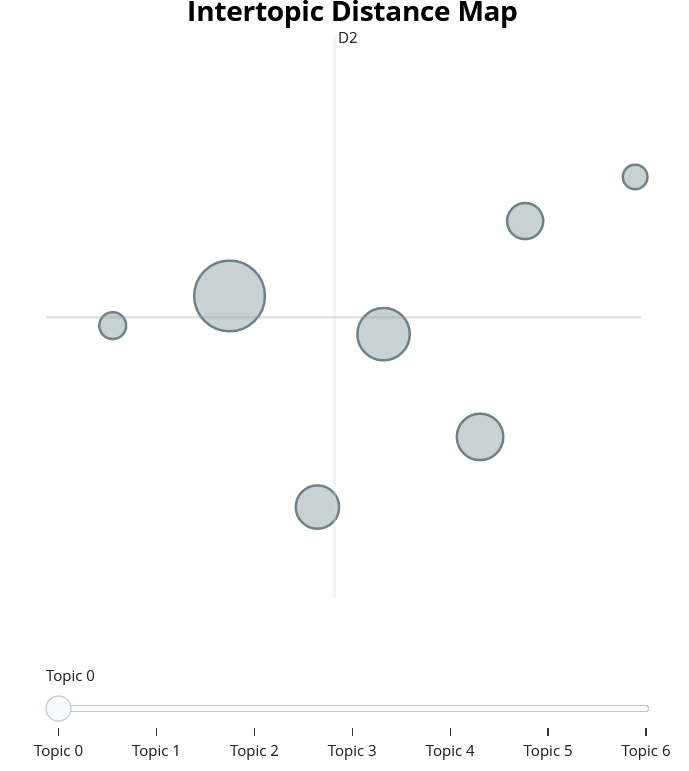

In [87]:
model.visualize_documents(df['toks'], embeddings=embeds)

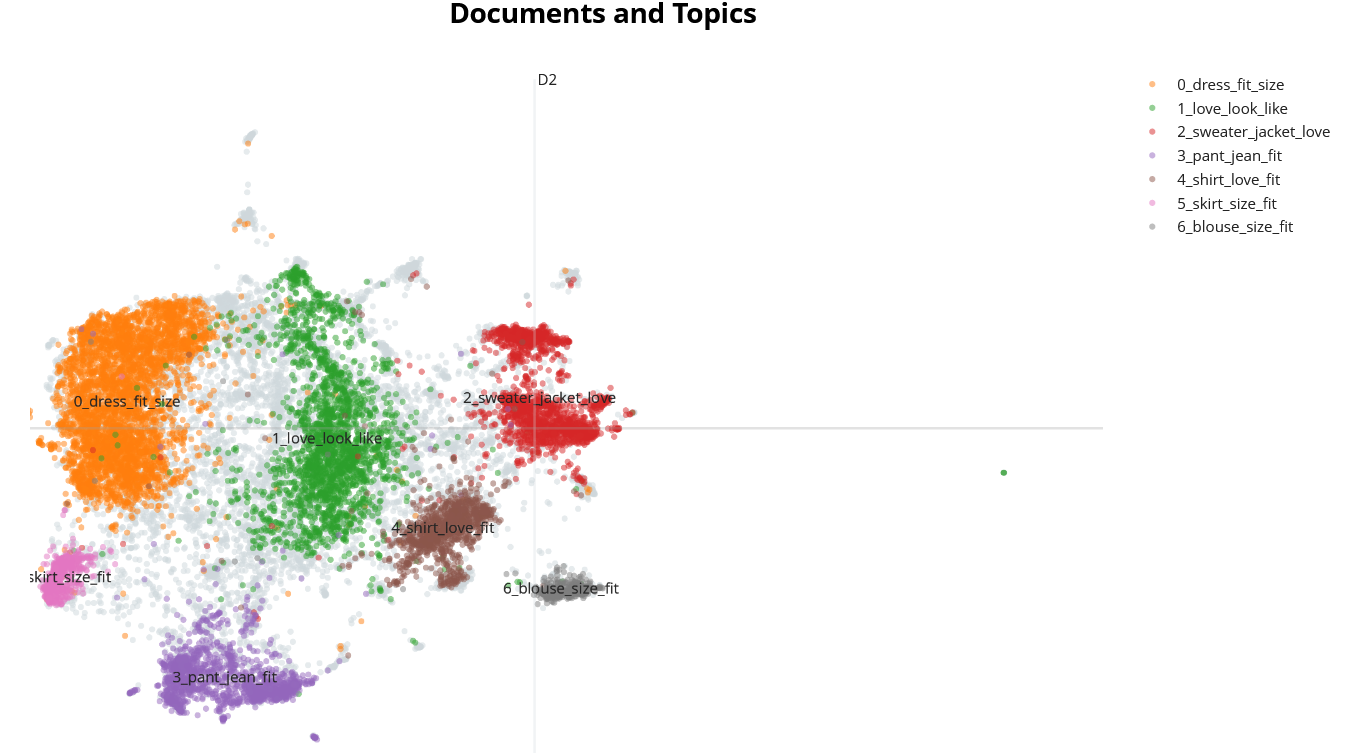